Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo θ cambia con una rapidez constante de : 

dθ/dt = ω < 0.

Al final de t segundos, la posición del objeto esta dada por:

x(t) = − g/2ω^2( e^(wt) − e^(-wt))/2 − sin ωt

Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de 10⁻⁵ , la rapidez ω con que cambia 0. Suponga que g=9.76m/s²


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [54]:
gravedad=9.76 #m/s2
x1=0.51 #m

fw=lambda w:0.51-((-gravedad/2*w**2)*((np.exp(w)-np.exp(-w))/2)-np.sin(w))


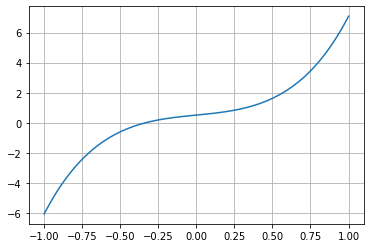

In [58]:
w=np.linspace(-1,1,100)

plt.plot(w,fw(w))
plt.grid()

In [56]:
#From Introduction to Scientific Programming with Python
def bisection(f,a,b,tol= 1e-3):
  if f(a)*f(b) > 0:
    print(f'No roots or more than one root in [{a},{b}]')
    return
  m = (a+b)/2
  while abs(f(m)) > tol:
    if f(a)*f(m) < 0:
      b=m
    else:
      a = m
    m = (a+b)/2
  return m
#call the method for f(x)= x**2-4*x+exp(-x)

sol = bisection(fw,-1,1,1e-6)
print(f'x = {sol:g} es una raiz aproximadada, f({sol:g}) = {f(sol):g}')


x = -0.332837 es una raiz aproximadada, f(-0.332837) = 2.83705


In [57]:
import scipy.optimize as optimize
optimize.bisect(fw, -0.5, 0.5)


-0.33283666653551336

En el diseño de los vehiculos para todo tipo de terreno, es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.

...

In [109]:
l = 89
h = 49
D = 55
b = np.deg2rad(11.5)
print(b)

0.2007128639793479


In [114]:
A = l*np.sin(b)
B = l*np.cos(b)
C = (h+0.5*D)*np.sin(b)-0.5*D*np.tan(b)
E = (h+0.5*D)*np.cos(b)-0.5*D

In [115]:
def Newton(f, dfdx, x0, tol= 1e-3):
  f0 = f(x0)
  while abs(f0) > tol:
    x1= x0-f0/dfdx(x0)
    x0= x1
    f0= f(x0)
  return x0

f= lambda x:A*np.sin(x)*np.cos(x)+B*(np.sin(x))**2-C*np.cos(x)-E*np.sin(x)
df= lambda x:A*np.cos(2*x)+B*np.sin(2*x)+C*np.sin(x)+E*np.cos(x)

sol = Newton(f,df,0,1e-6)
print(f'x = {sol:g} is an approximate root, f({sol:g}) = {f(sol):g}')
print(np.rad2deg(sol))


x = 0.575473 is an approximate root, f(0.575473) = -6.97845e-07
32.972174058027505
